In [1]:
import pickle
import pandas as pd
import re

with open('data_pickle_format/labeled_vacancies_final.pickle', 'rb') as f:
    real_df = pickle.load(f)

real_df['company_name'] = real_df['description'].str.extract(
    r'Company\s*name:\s*(.*?)\s*Job\s*requirements:',
    flags=re.IGNORECASE,
    expand=False
).str.strip()


real_df['requirements'] = real_df['description'].str.extract(
    r'Job\s*requirements\s*:\s*(.*?)\s*Company\s*info:',
    flags=re.IGNORECASE | re.DOTALL,
    expand=False
).str.strip()

real_df['info'] = real_df['description'].str.extract(
    r'Company\s*info\s*:\s*(.*?)\s*Compensation\s*benefits:',
    flags=re.IGNORECASE | re.DOTALL,
    expand=False
).str.strip()

real_df['benefits'] = real_df['description'].str.extract(
    r'Compensation\s*benefits*:\s*(.*?)\s*Certifications:',
    flags=re.IGNORECASE | re.DOTALL,
    expand=False
).str.strip()

real_df['certifications'] = real_df['description'].str.extract(
    r'Certifications\s*:\s*(.*?)\s*Remote\s*possible:',
    flags=re.IGNORECASE | re.DOTALL,
    expand=False
).str.strip()

real_df['remote'] = real_df['description'].str.extract(
    r'Remote\s*possible\s*:\s*(True|False)',
    flags=re.IGNORECASE,
    expand=False
).str.strip()

In [2]:
from string import punctuation
import html

def preprocess_text(text):
    text = text.lower()
    text = html.unescape(text)
    text = re.sub(r"https?://\S+", "", text) # remove http links
    text = re.sub(r"<.*?>", " ", text) # remove html tags
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text

real_df["description"] = real_df["description"].map(preprocess_text)
real_df["company_name"] = real_df["company_name"].map(preprocess_text)
real_df["requirements"] = real_df["requirements"].map(preprocess_text)
real_df["info"] = real_df["info"].map(preprocess_text)
real_df["benefits"] = real_df["benefits"].map(preprocess_text)
real_df["certifications"] = real_df["certifications"].map(preprocess_text)
real_df["remote"] = real_df["remote"].map(preprocess_text)

pd.set_option('display.max_colwidth', None)
real_df.head(2)

,description,women_proportion,company_name,requirements,info,benefits,certifications,remote
0,company name ministerie van financi n belastingdienst job requirements tmap next foundation ervaring met projecten in een agile omgeving senior tester met ervaring in testautomatisering 5 jaar kennis en ervaring met agilescrum wensen testtooling robotframework functioneel testen integratietesten performancetesten kennis van xml mq db2 kennis van container platforms location apeldoorn nederland none company info none compensation benefits dit is een opdracht tussen de 32 36 uur per week de startdatum is in overleg en de looptijd van de opdracht is in eerste instantie tot 31 december 2023 waarna er optie tot verlenging is voor deze rol zal je door yacht gedetacheerd worden bij de belastingdienst als senior tester je reiskosten worden uiteraard volledig vergoed een elektrische leaseauto welke je ook priv mag rijden behoort tot de mogelijkheden ook ontvang je een bonusregeling tot maximaal 8 van je bruto jaarsalaris 25 vakantiedagen en 833 vakantiegeld op fulltime jaarbasis daarnaast gaan we graag met je in gesprek over je persoonlijke ontwikkelingsplan en bespreken welke trainingen en opleidingen gewenst zijn want blijven ontwikkelen zijn de sleutelwoorden job type tijdelijke functieopdracht certifications tmap next foundation ervaring met projecten in een agile omgeving senior tester met ervaring in testautomatisering 5 jaar kennis en ervaring met agilescrum wensen testtooling robotframework functioneel testen integratietesten performancetesten kennis van xml mq db2 kennis van container platforms remote possible false,0.40,ministerie van financi n belastingdienst,tmap next foundation ervaring met projecten in een agile omgeving senior tester met ervaring in testautomatisering 5 jaar kennis en ervaring met agilescrum wensen testtooling robotframework functioneel testen integratietesten performancetesten kennis van xml mq db2 kennis van container platforms location apeldoorn nederland none,none,dit is een opdracht tussen de 32 36 uur per week de startdatum is in overleg en de looptijd van de opdracht is in eerste instantie tot 31 december 2023 waarna er optie tot verlenging is voor deze rol zal je door yacht gedetacheerd worden bij de belastingdienst als senior tester je reiskosten worden uiteraard volledig vergoed een elektrische leaseauto welke je ook priv mag rijden behoort tot de mogelijkheden ook ontvang je een bonusregeling tot maximaal 8 van je bruto jaarsalaris 25 vakantiedagen en 833 vakantiegeld op fulltime jaarbasis daarnaast gaan we graag met je in gesprek over je persoonlijke ontwikkelingsplan en bespreken welke trainingen en opleidingen gewenst zijn want blijven ontwikkelen zijn de sleutelwoorden job type tijdelijke functieopdracht,tmap next foundation ervaring met projecten in een agile omgeving senior tester met ervaring in testautomatisering 5 jaar kennis en ervaring met agilescrum wensen testtooling robotframework functioneel testen integratietesten performancetesten kennis van xml mq db2 kennis van container platforms,false
1,company name belastingdienst job requirements gecertificeerd scrum master minimaal psm ii of vergelijkbaar meerdere jaren aantoonbare ervaring als scrum master waaronder ervaring met safe of andere opschalingsmodellen ervaring met implementatie trajecten binnen een complexe omgeving professioneel vaardig in het nederlands en engels location apeldoorn nederland none company info de iv organisatie van de belastingdienst is verantwoordelijk voor en verzorgt de ict voorzieningen het merendeel van de applicaties wordt op dit moment door de iv organisatie zelf ontwikkeld onderhouden en beheerd in het eigen data center naast de zorg voor continu teit op de massale heffing en inningsprocessen die plaatsvinden binnen een degelijke stabiele omgeving wordt er tevens volop gewerkt aan modernisering van het iv landschap dit gebeurt deels intern door gebruik te maken van de expertise die intern aanwezig is maar 

In [ ]:
import py3langid as langid

languages = []
for description in real_df['description']:
    lang, confidence = langid.classify(description)
    languages.append(lang)

real_df['language'] = languages

real_df.tail(2)

description  \
2373                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    company name duo job requirements minimaal hbo werk en denkniveau relevante werkervaring als requirements engineerinformatie analist kennis van etl tooling je beheerst de nederlandse in woord en geschrift location groningen none company info duo verzorgt als uitvoeringsorganisatie zijnde onderdeel van het ministerie van onderwijs cultuur en wetenschap de uitvoering van complexe wet en regel

In [4]:
import spacy
nlpNL = spacy.load("nl_core_news_sm")
nlpEN = spacy.load("en_core_web_sm")

print(real_df.loc[real_df['language'] == 'nl', 'requirements'].head(10).tolist())

def process_nl(text):
    if isinstance(text, str) and text.strip():
        doc = nlpNL(text)
        filtered = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
        return filtered
    else:
        return []
    
real_df.loc[real_df['language'] == 'nl', 'requirements'] = real_df.loc[real_df['language'] == 'nl', 'requirements'].apply(process_nl)



['tmap next foundation ervaring met projecten in een agile omgeving senior tester met ervaring in testautomatisering 5 jaar kennis en ervaring met agilescrum wensen testtooling robotframework functioneel testen integratietesten performancetesten kennis van xml mq db2 kennis van container platforms location apeldoorn nederland none', 'gecertificeerd scrum master minimaal psm ii of vergelijkbaar meerdere jaren aantoonbare ervaring als scrum master waaronder ervaring met safe of andere opschalingsmodellen ervaring met implementatie trajecten binnen een complexe omgeving professioneel vaardig in het nederlands en engels location apeldoorn nederland none', '3 jaar ervaring in het volgende eisenpakket hbo denk en werkniveau relevante werkervaring in modelleren relevante werkervaring in een java omgeving relevante werkervaring met rest nice to have ervaring met java swing is een pr ervaring met velocity is een pr location groningen none', '5 jaar ervaring met de volgende eisen relevante ervar

In [ ]:
def process_en(text):
    if isinstance(text, str) and text.strip():
        doc = nlpEN(text)
        return [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
    else:
        return []

real_df.loc[real_df['language'] == 'en', 'requirements'] = real_df.loc[real_df['language'] == 'en', 'requirements'].apply(process_en)

real_df['requirements'].tail(5)

2370    [kennis, ervaring, helpen, succesvol, energie, krijgen, functie, it, relateren, enof, bedrijfseconomisch, achtergrond, uitbreiden, ervaring, implementeren, webapplicatie, software, Management, implementatie, bedrijf, kritisch, dienst, product, groot, impact, maatschappij, werken, ontwikkeling, toepassing, divers, api, s, afhankelijkhed, verschillend, functionaliteit, betaalsysteom, applicatie, High, level, analyseren, hierover, begrijpelijk, communiceren, communicatief, mondeling, schriftelijk, vaardig, servicegericht, sterk, onderhouden, klantrelatie, onderling, communicatie, team, divers, stakeholder, mensgericht, teamspeler, richten, samenwerking, resultaat, behalen, verantwoordelijk, kwaliteitsgericht, persoonlijkheid, stressbestendig, relativeren, prioriteren, omgevingsbewustzijn, relevant, ontwikkeling, klant, team, meeweg, actie, wennen, werken, divers, werk, cultuur, communicatie, Engels, Nederlands, spreken, location, Utrecht, welkom, netwerk]
2371                     

In [ ]:
counts_0_4 = real_df.loc[real_df['women_proportion'] == 0]
counts_1_4 = real_df.loc[real_df['women_proportion'] <= 0.25]
counts_2_4 = real_df.loc[(real_df['women_proportion'] > 0.25) & (real_df['women_proportion'] <= 0.5)]
counts_3_4 = real_df.loc[(real_df['women_proportion'] > 0.5) & (real_df['women_proportion'] <= 0.75)]
counts_4_4 = real_df.loc[real_df['women_proportion'] > 0.75]
counts_5_4 = real_df.loc[real_df['women_proportion'] == 1]

In [ ]:
from nltk import FreqDist
import numpy as np

lemmas_0 = counts_0_4['requirements'].values
flat_0 = np.concatenate(lemmas_0).tolist()
freq_dic_0 = FreqDist(flat_0)
display(freq_dic_0)

lemmas_1 = counts_1_4['requirements'].values
flat_1 = np.concatenate(lemmas_1).tolist()
freq_dic_1=FreqDist(flat_1)
display(freq_dic_1)

lemmas_2 = counts_2_4['requirements'].values
flat_2_4 = np.concatenate(lemmas_2).tolist()
freq_dic_2=FreqDist(flat_2_4)
display(freq_dic_2)

lemmas_3 = counts_3_4['requirements'].values
flat_3 = np.concatenate(lemmas_3).tolist()
freq_dic_3=FreqDist(flat_3)
display(freq_dic_3)

lemmas_4 = counts_4_4['requirements'].values
flat_4_4 = np.concatenate(lemmas_4).tolist()
freq_dic_4 = FreqDist(flat_4_4)
display(freq_dic_4)

lemmas_5 = counts_5_4['requirements'].values
flat_5_5 = np.concatenate(lemmas_5).tolist()
freq_dic_5 = FreqDist(flat_5_5)
display(freq_dic_5)

FreqDist({'ervaring': 3216, 'kennis': 1986, 'jaar': 1412, 'location': 1185, 'minimaal': 1090, 'werkervaring': 764, 'aantoonbaar': 729, 'werk': 710, 'noon': 701, '3': 625, ...})

FreqDist({'ervaring': 3806, 'kennis': 2298, 'jaar': 1627, 'location': 1466, 'minimaal': 1273, 'werkervaring': 873, 'noon': 866, 'werk': 845, 'aantoonbaar': 825, '3': 728, ...})

FreqDist({'ervaring': 1117, 'kennis': 700, 'location': 544, 'jaar': 470, 'werkervaring': 372, 'minimaal': 360, 'experience': 322, 'noon': 296, 'werk': 274, '3': 254, ...})

FreqDist({'ervaring': 275, 'kennis': 136, 'location': 109, 'jaar': 95, 'noon': 76, 'minimaal': 72, 'werkervaring': 72, 'werk': 61, '3': 55, 'relevant': 52, ...})

FreqDist({'ervaring': 500, 'kennis': 277, 'location': 206, 'jaar': 145, 'minimaal': 128, 'noon': 116, 'werk': 114, 'experience': 94, 'werken': 91, 'team': 90, ...})

FreqDist({'ervaring': 491, 'kennis': 270, 'location': 201, 'jaar': 138, 'minimaal': 123, 'noon': 115, 'werk': 111, 'experience': 93, 'werken': 91, 'team': 90, ...})

In [ ]:
dutch_stopwords = [
    'de', 'en', 'van', 'ik', 'te', 'dat', 'die', 'in', 'een', 'hij', 'het', 'niet', 'zijn', 'is', 'was',
    'op', 'aan', 'met', 'als', 'voor', 'had', 'er', 'maar', 'om', 'hem', 'dan', 'zou', 'of', 'wat',
    'mijn', 'men', 'dit', 'zo', 'door', 'over', 'ze', 'zich', 'bij', 'ook', 'tot', 'je', 'mij',
    'uit', 'der', 'daar', 'haar', 'naar', 'heb', 'hoe', 'heeft', 'hebben', 'deze', 'u', 'want', 'nog',
    'zal', 'me', 'zij', 'nu', 'ge', 'geen', 'omdat', 'iets', 'worden', 'toch', 'al', 'waren', 'veel',
    'meer', 'doen', 'toen', 'moet', 'ben', 'zonder', 'kan', 'hun', 'dus', 'alles', 'onder', 'ja',
    'eens', 'hier', 'wie', 'werd', 'altijd', 'doch', 'wordt', 'wezen', 'kunnen', 'ons', 'zelf',
    'tegen', 'na', 'reeds', 'wil', 'kon', 'niets', 'uw', 'iemand', 'geweest', 'andere', 'meet', 'hebt', 'ervaring', 'kenni', 'kennis', 'jaar', 'company',
    'job', 'ervare', 'werken', 'minimaal', 'yacht', 'werkervare',
    'requirement', 'organisatie', '3', '2', '5', 'n', 'bent', 'jij', 'location', 'noon', 'werkervaring' ,'experience', 'werk'
]

fd0_filtered = FreqDist({word: freq for word, freq in freq_dic_0.items() if word.lower() not in dutch_stopwords})
fd1_filtered = FreqDist({word: freq for word, freq in freq_dic_1.items() if word.lower() not in dutch_stopwords})
fd2_filtered = FreqDist({word: freq for word, freq in freq_dic_2.items() if word.lower() not in dutch_stopwords})
fd3_filtered = FreqDist({word: freq for word, freq in freq_dic_3.items() if word.lower() not in dutch_stopwords})
fd4_filtered = FreqDist({word: freq for word, freq in freq_dic_4.items() if word.lower() not in dutch_stopwords})
fd5_filtered = FreqDist({word: freq for word, freq in freq_dic_5.items() if word.lower() not in dutch_stopwords})

display(fd0_filtered)
display(fd1_filtered)
display(fd2_filtered)
display(fd3_filtered)
display(fd4_filtered)
display(fd5_filtered)

NameError: name 'FreqDist' is not defined

<Axes: title={'center': '100 %'}, xlabel='Samples', ylabel='Counts'>

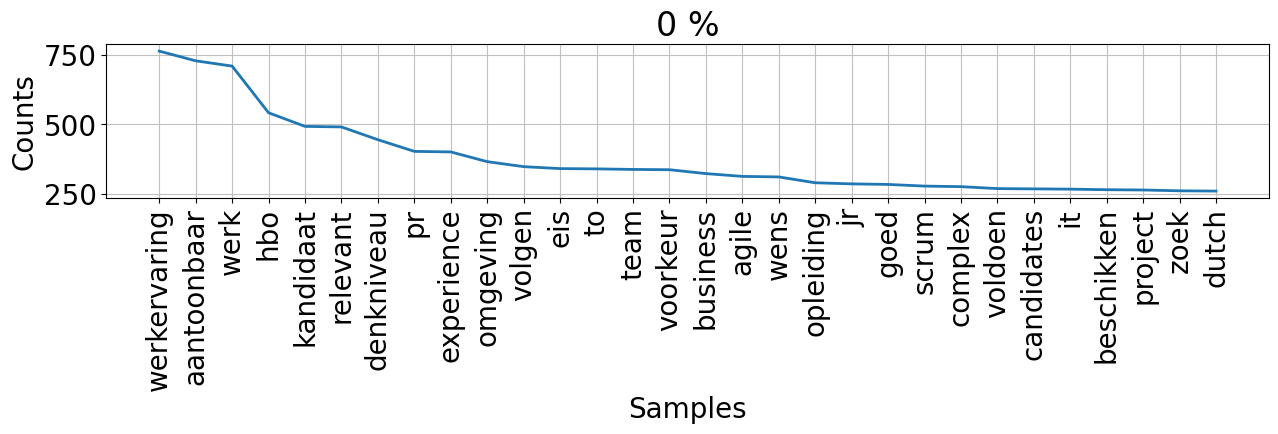

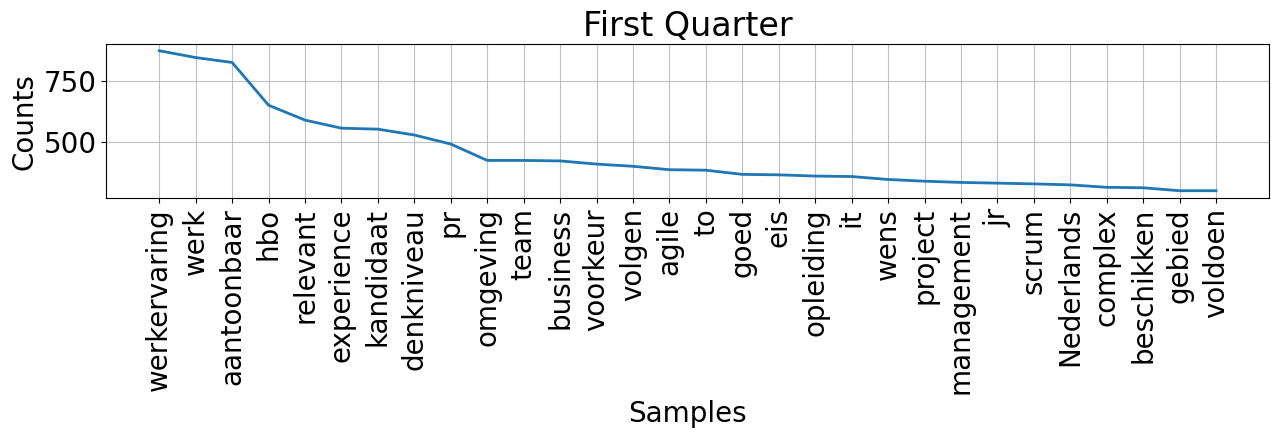

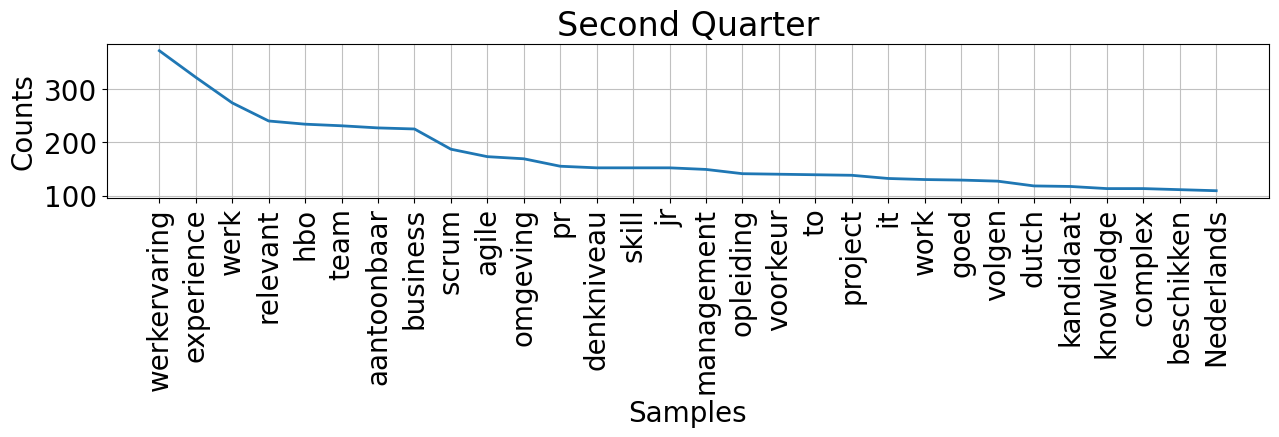

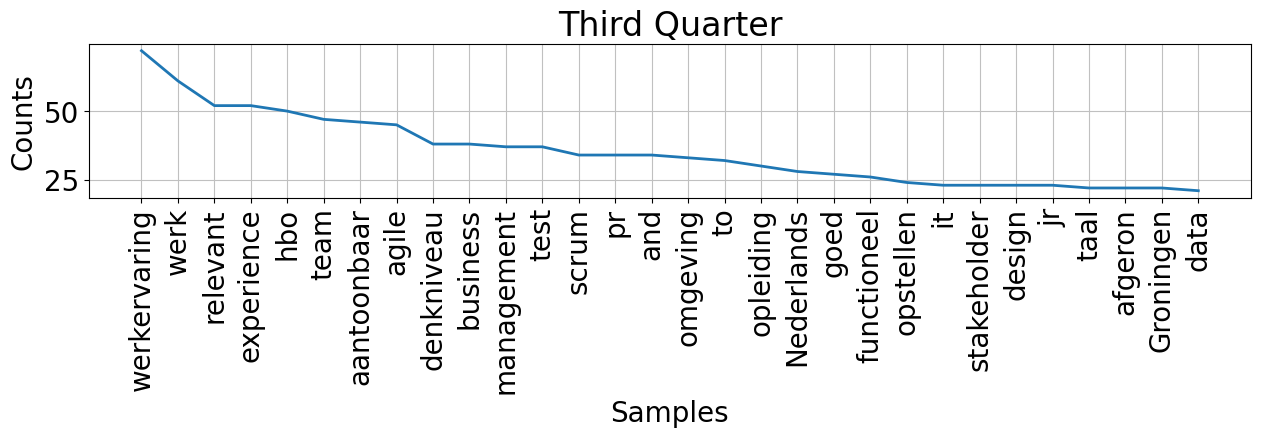

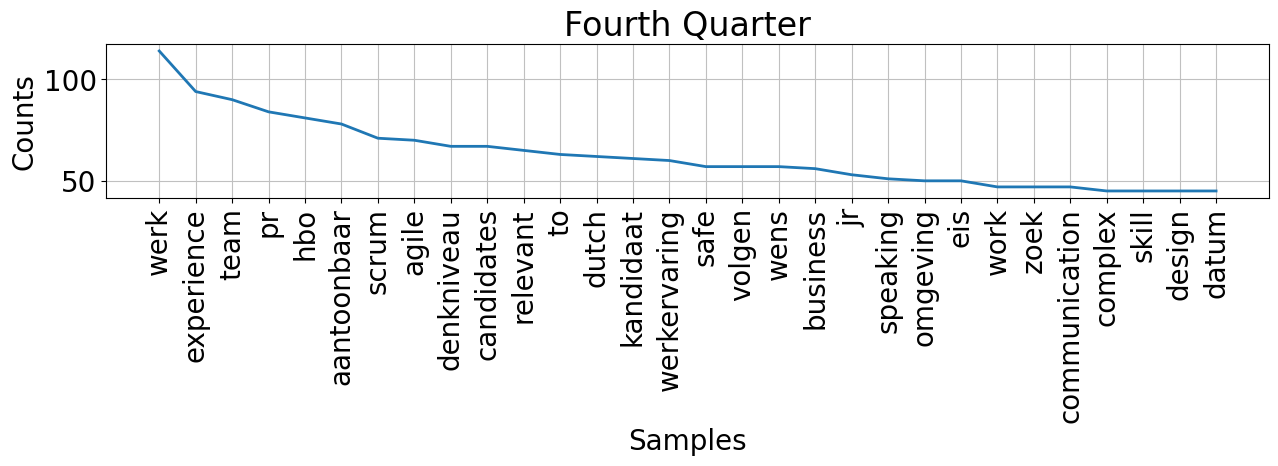

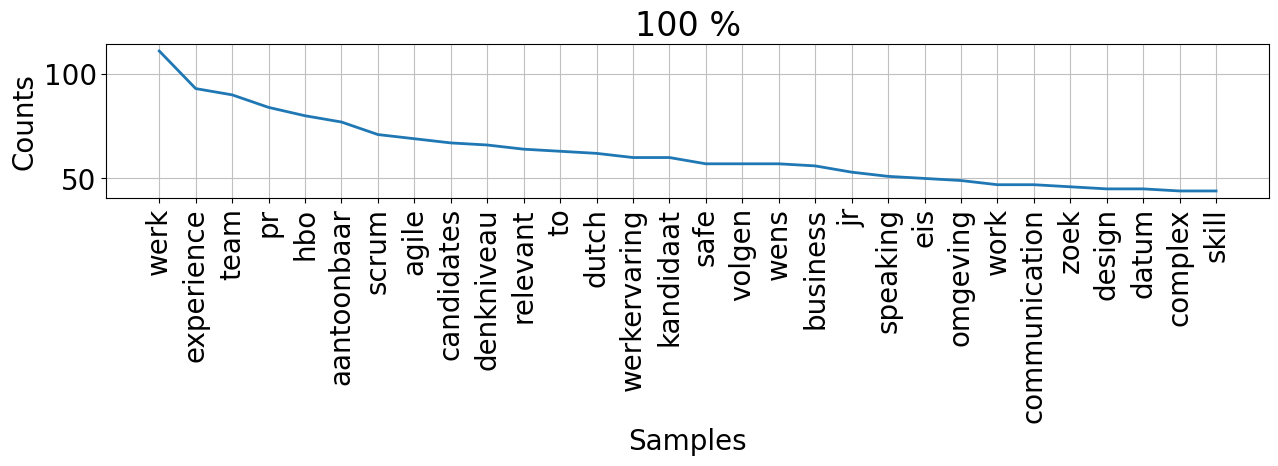

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '20'

plt.figure(figsize=(15,2))
fd0_filtered.plot(30,  title='0 %')
plt.figure(figsize=(15,2))
fd1_filtered.plot(30,  title='First Quarter')
plt.figure(figsize=(15,2))
fd2_filtered.plot(30,  title='Second Quarter')
plt.figure(figsize=(15,2))
fd3_filtered.plot(30,  title='Third Quarter')
plt.figure(figsize=(15,2))
fd4_filtered.plot(30,  title='Fourth Quarter')
plt.figure(figsize=(15,2))
fd5_filtered.plot(30,  title='100 %')